In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import plotly


i think implementation of MIMO is simple. should take the input array and the parameter array .. as of now assume that all the model strucures are same. later I  will improve the code , by allowing different model structures for inputs

In [2]:
import mpld3
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df = pd.read_csv("D:\\OneDrive\\icon\\Icon\\AIDApro DC4 Tutorial.csv",header = [0,1,2])



dataframe interpolation only fills missing values .. numpy interpolation only applicable for 1d and returns only descrete values. scipy interpolation returns functions , but maybe slower.

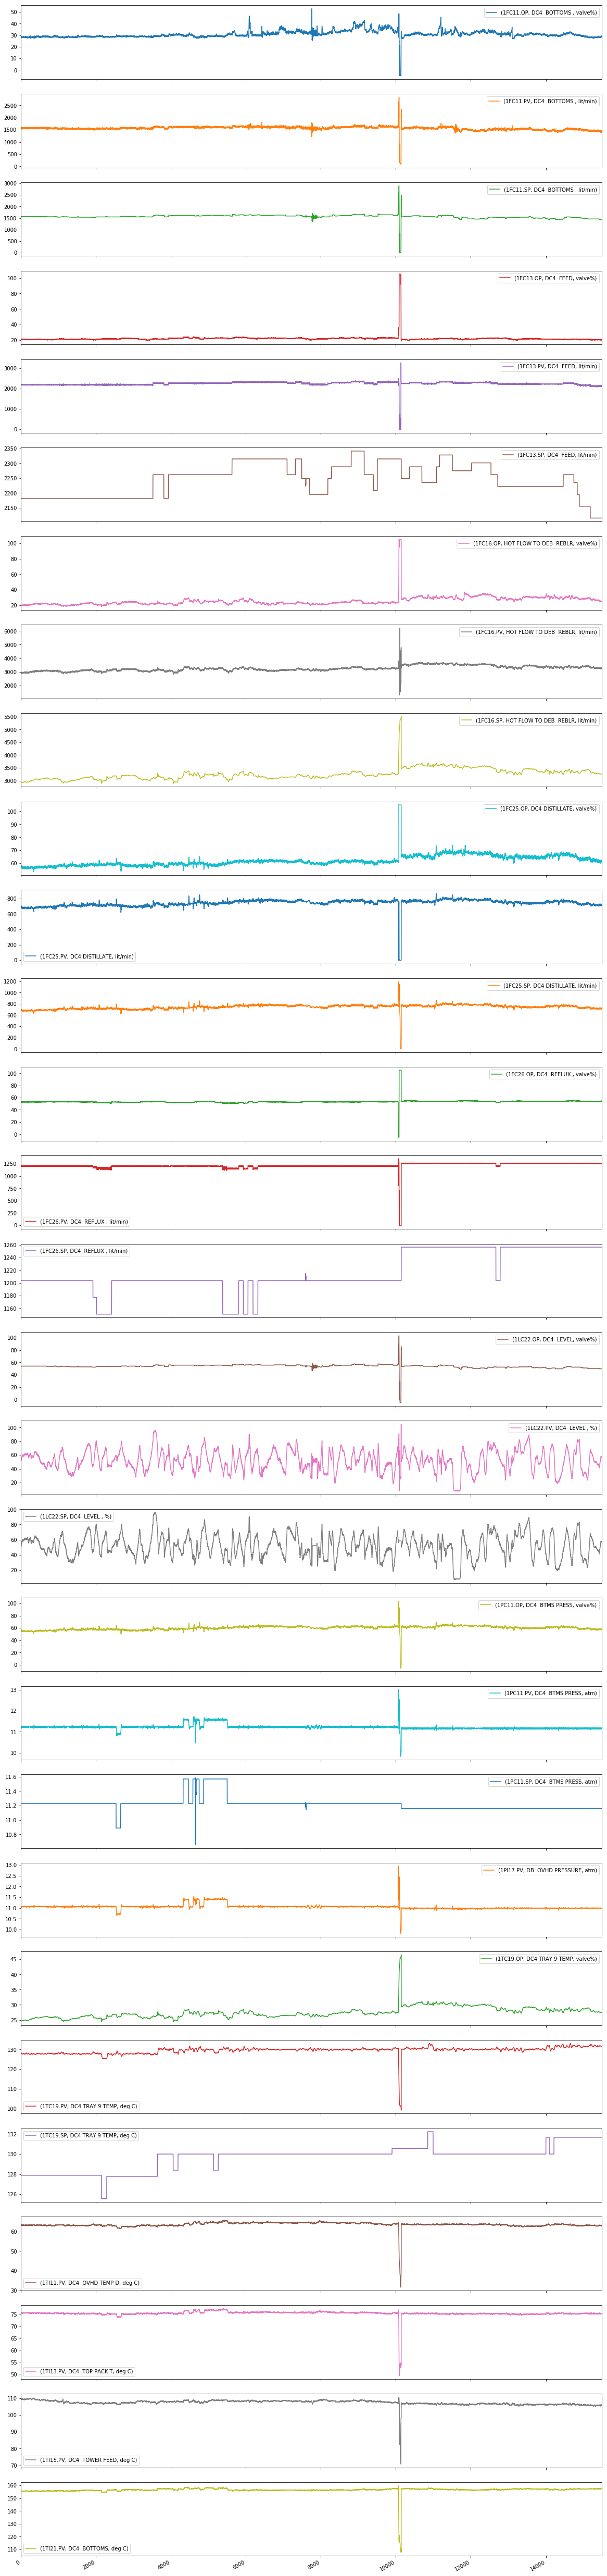

In [4]:
df.plot(subplots=True, figsize=(20, 100));

#### let us zoom in from sample numbers 10000 to 120000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266156AE320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026613615A90>], dtype=object)

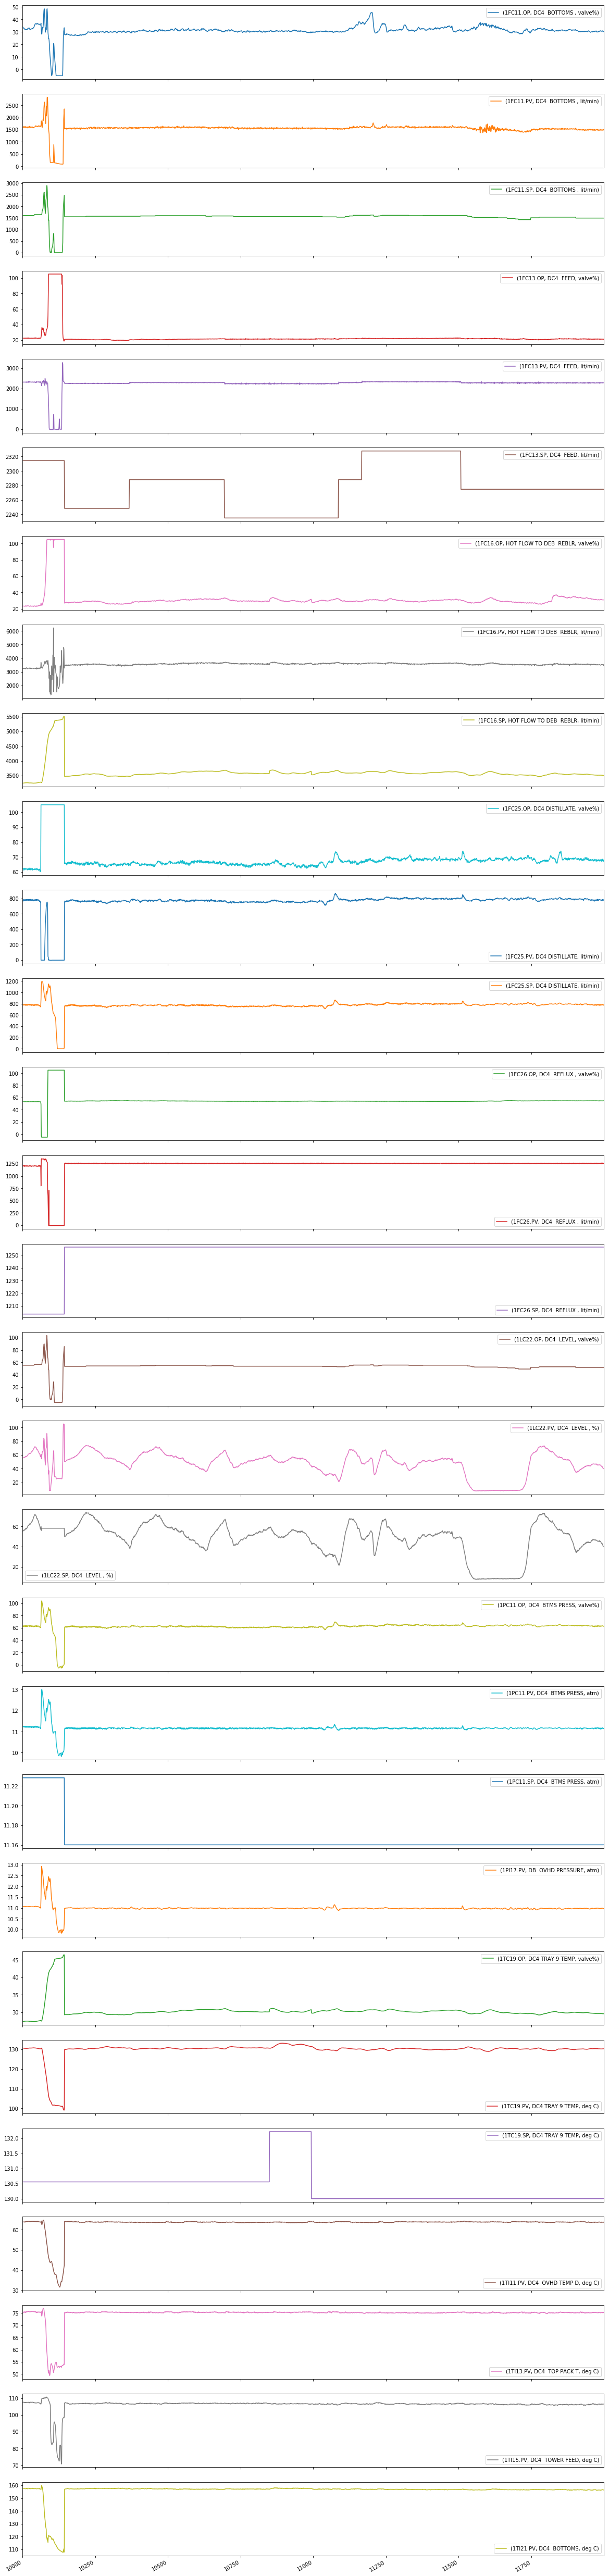

In [5]:
df[10000:12000].plot(subplots=True,figsize=(20,100))

In [6]:
### Do not consider the SV and the OP while calculating the std for bad data . Consider only the PV 

In [7]:
SV_suffixes = ['SP','SV','SPT']
PV_suffixes =['PV','MEAS']
OP_suffixes = ['OP','MV']


In [8]:
tags = df.columns.tolist()


In [9]:
tag_names , tag_descriptions,tag_units = zip(*tags)

In [34]:
def get_parameter_type(tag_names):
    parameters = []
    for name in tag_names:
        if '.PV' in name:
            parameters.append('PV')
        elif '.SP' in name:
            parameters.append('SP')
        elif '.OP' in name:
            parameters.append('OP')
        else :
            parameters.append('others')
    return parameters

In [35]:
parameters = get_parameter_type(tag_names)

In [36]:
parameters

['OP',
 'PV',
 'SP',
 'OP',
 'PV',
 'SP',
 'OP',
 'PV',
 'SP',
 'OP',
 'PV',
 'SP',
 'OP',
 'PV',
 'SP',
 'OP',
 'PV',
 'SP',
 'OP',
 'PV',
 'SP',
 'PV',
 'OP',
 'PV',
 'SP',
 'PV',
 'PV',
 'PV',
 'PV']

In [37]:
pv_sv_mv_group = df.groupby(parameters,axis=1)

In [41]:
pv_group = pv_sv_mv_group.get_group('PV')

In [45]:
pv_group.std()

1FC11.PV  DC4  BOTTOMS            lit/min     99.635551
1FC13.PV  DC4  FEED               lit/min    131.164943
1FC16.PV  HOT FLOW TO DEB  REBLR  lit/min    193.227563
1FC25.PV  DC4 DISTILLATE          lit/min     59.788651
1FC26.PV  DC4  REFLUX             lit/min     79.710827
1LC22.PV  DC4  LEVEL              %           14.948446
1PC11.PV  DC4  BTMS PRESS         atm          0.124386
1PI17.PV  DB  OVHD PRESSURE       atm          0.123235
1TC19.PV  DC4 TRAY 9 TEMP         deg C        2.140549
1TI11.PV  DC4  OVHD TEMP D        deg C        1.709460
1TI13.PV  DC4  TOP PACK T         deg C        1.483661
1TI15.PV  DC4  TOWER FEED         deg C        1.672452
1TI21.PV  DC4  BOTTOMS            deg C        2.845095
dtype: float64

In [46]:
pv_group[(np.abs(pv_group - pv_group.median()) > 5*pv_group.std()).any(axis=1)]

1FC11.PV   1FC13.PV               1FC16.PV       1FC25.PV  \
      DC4  BOTTOMS   DC4  FEED HOT FLOW TO DEB  REBLR DC4 DISTILLATE   
            lit/min    lit/min                lit/min        lit/min   
4665      1559.2148  2293.8255              3240.6778       748.1790   
10064     1629.1700  2277.0683              3686.0032        -0.6758   
10065     1858.9504  2255.8525              3320.9059        -1.0831   
10066     1856.9902  2132.4217              3322.6096        -1.0913   
10067     1689.7998  2232.2509              3312.4129        -1.0911   
10068     1595.5098  2354.9086              3253.8023        -1.0874   
10069     1742.8117  2357.5388              3304.2581        -1.0950   
10070     1803.1462  2353.9902              3329.0026        -1.1080   
10071     1920.3930  2244.7655              3399.1638        -1.1027   
10072     1880.5387  2388.5191              3444.1735        -1.1310   
10073     1916.7828  2349.4064              3469.8591        -1.1403   
10074     2380.9999  2343.4065              3523.0104        -1.1416   
10075     2560.6750  2359.9193              3553.9384        -1.1440   
10076     2632.7346  2344.5560              3745.8834        -1.1368   
10077     2487.2284  2148.2677              3639.1233       159.5982   
10078     2182.4495  2491.5913              3600.9138       341.2137   
10079     1954.5410  2378.3888              3620.9309       472.6345   
10080     1753.9154  2298.9203              3732.1929       541.8092   
10081     2068.5595  2245.2598              3761.9414       606.9976   
10082     2459.7950  2199.2916              3752.6966       682.9321   
10083     2065.2406  2295.8132              3736.8216       706.6340   
10084     2326.5338  2333.3722              3821.5674       744.4204   
10085     2817.0916  2265.6263              3618.3415       754.1532   
10086     2833.8689  2272.4954              3543.9958       744.3620   
10087     2653.1572  2256.9166              3764.7343       573.6949   
10088     2236.9384  1918.5817              3827.6797        47.3762   
10089     1954.7923  1679.6149              3590.4973        38.7090   
10090     1556.5069  1235.1383              3409.5849        -0.6295   
10091     1433.5022   754.7492              3098.1467         6.2583   
10092     1314.3965    68.0347              2505.3919         2.1126   
...             ...        ...                    ...            ...   
10115      136.1188   -13.2250              2912.3595        -1.3169   
10116      133.9277   -13.2250              2862.8290        -1.3040   
10117      125.0463   -13.2250              2696.1887        -1.3098   
10118      129.1088   -13.2250              1514.5146        -1.3066   
10119      126.1416   -13.2250              2243.8783        -1.3058   
10120      123.6805   -13.2250              2632.3281        -1.3061   
10121      121.4238   -13.2250              2081.8943        -1.2987   
10122      118.9869   -13.2250              1931.3721        -1.2942   
10123      116.1092   -13.2250              1770.5223        -1.3032   
10124      111.7454   -13.2250              1754.0013        -1.2958   
10125      108.9494   -12.3775              1796.8326        -1.2863   
10126      105.3969   127.9553              1875.0984        -1.2931   
10127      103.6409   509.7441              1924.0725        -1.2691   
10128      101.8886   207.8446              2134.6483        -1.2619   
10129       97.3498     2.4091              2596.2635        -1.2659   
10130       95.5702     0.9271              3440.2801        -1.2664   
10131       94.9034     1.5695              2952.2300        -1.2590   
10132       93.7716     0.2621              2956.2160        -1.2387   
10133       93.3611    -5.8470              3335.6862        -1.2434   
10134       91.6929    -3.8958              3701.3601        -1.2439   
10135       91.4189     8.9700              4560.5778        -1.2529   
10136       90.6902  1756.2919              3416.10

In [45]:
df[(np.abs(df - df.median()) > 5*df.std()).any(axis=1)].dropna()

1FC11.OP      1FC11.PV      1FC11.SP  1FC13.OP   1FC13.PV  \
      DC4  BOTTOMS  DC4  BOTTOMS  DC4  BOTTOMS  DC4  FEED  DC4  FEED   
             valve%       lit/min       lit/min    valve%    lit/min   
4665        28.4342     1559.2148     1587.0000   22.6304  2293.8255   
6093        46.5404     1591.0688     1639.9000   22.3034  2311.7168   
6094        46.3804     1655.4277     1639.9000   22.1630  2320.5349   
6095        46.5055     1635.0366     1639.9000   22.3113  2313.1329   
7758        47.3647     1216.5514     1534.1000   20.8606  2191.8501   
7759        51.8635     1326.2969     1534.1000   20.7229  2197.3515   
7760        52.8020     1500.6505     1534.1000   21.0012  2180.8231   
7761        51.3989     1644.4134     1573.7750   20.8138  2194.1859   
7762        48.0202     1759.9142     1573.7750   20.7264  2205.1786   
10064       37.0010     1629.1700     1645.1900   23.3146  2277.0683   
10065       32.2896     1858.9504     1645.1900   25.5494  2255.8525   
10066       28.5517     1856.9902     1645.1900   31.0563  2132.4217   
10067       28.1430     1689.7998     1680.3055   35.9809  2232.2509   
10068       31.3865     1595.5098     1791.8232   35.6724  2354.9086   
10069       33.3303     1742.8117     1850.0918   33.8947  2357.5388   
10070       33.8776     1803.1462     1865.8050   32.9749  2353.9902   
10071       33.3188     1920.3930     1913.8061   35.4132  2244.7655   
10072       35.9545     1880.5387     2092.9546   33.9190  2388.5191   
10073       43.5140     1916.7828     2403.9659   31.9013  2349.4064   
10074       46.9448     2380.9999     2589.6394   29.8413  2343.4065   
10075       48.5506     2560.6750     2613.5097   28.0447  2359.9193   
10076       46.2899     2632.7346     2373.1585   26.2825  2344.5560   
10077       40.5216     2487.2284     2015.8026   29.5246  2148.2677   
10078       35.0722     2182.4495     1853.4033   25.4842  2491.5913   
10079       29.7496     1954.5410     1690.6311   26.6130  2378.3888   
10080       31.0274     1753.9154     1961.1506   26.1106  2298.9203   
10081       33.4433     2068.5595     2264.3956   27.7705  2245.2598   
10082       31.8384     2459.7950     2353.1716   31.3832  2199.2916   
10083       35.2113     2065.2406     2500.9787   33.9113  2295.8132   
10084       46.6421     2326.5338     2899.7135   33.8558  2333.3722   
...             ...           ...           ...       ...        ...   
10115       -2.5962      136.1188        0.0000  105.0000   -13.2250   
10116       -5.0000      133.9277        0.0000  105.0000   -13.2250   
10117       -5.0000      125.0463        0.0000  105.0000   -13.2250   
10118       -5.0000      129.1088        0.0000  105.0000   -13.2250   
10119       -5.0000      126.1416        0.0000  105.0000   -13.2250   
10120       -5.0000      123.6805        0.0000  105.0000   -13.2250   
10121       -5.0000      121.4238        0.0000  105.0000   -13.2250   
10122       -5.0000      118.9869        0.0000  105.0000   -13.2250   
10123       -5.0000      116.1092        0.0000  105.0000   -13.2250   
10124       -5.0000      111.7454        0.0000  105.0000   -13.2250   
10125       -5.0000      108.9494        0.0000  105.0000   -12.3775   
10126       -5.0000      105.3969        0.0000  105.0000   127.9553   
10127       -5.0000      103.6409        0.0000  105.0000   509.7441   
10128       -5.0000      101.8886        0.0000  105.0000   207.8446   
10129       -5.0000       97.3498        0.0000  105.0000     2.4091   
10130       -5.0000       95.5702        0.0000  105.0000     0.9271   
10131       -5.0000       94.9034        0.0000  105.0000     1.5695   
10132       -5.0000       93.7716        0.0000  105.0000     0.2621   
10133       -5.0000       93.3611        0.0000  105.0000    -5.8470   
10134       -5.0000       91.6929        0.0000  105.0000    -3.8958   
10135       -5.0000       91.4189        0.0000  105.0000     8.9700   
10136       -5.0000       90.6902        0.0000   9

In [15]:
df.std(0)

1FC11.OP  DC4  BOTTOMS            valve%       3.156191
1FC11.PV  DC4  BOTTOMS            lit/min     99.635551
1FC11.SP  DC4  BOTTOMS            lit/min    100.859356
1FC13.OP  DC4  FEED               valve%       4.754483
1FC13.PV  DC4  FEED               lit/min    131.164943
1FC13.SP  DC4  FEED               lit/min     54.076327
1FC16.OP  HOT FLOW TO DEB  REBLR  valve%       6.384787
1FC16.PV  HOT FLOW TO DEB  REBLR  lit/min    193.227563
1FC16.SP  HOT FLOW TO DEB  REBLR  lit/min    220.624581
1FC25.OP  DC4 DISTILLATE          valve%       4.625450
1FC25.PV  DC4 DISTILLATE          lit/min     59.788651
1FC25.SP  DC4 DISTILLATE          lit/min     47.452909
1FC26.OP  DC4  REFLUX             valve%       3.923719
1FC26.PV  DC4  REFLUX             lit/min     79.710827
1FC26.SP  DC4  REFLUX             lit/min     30.788175
1LC22.OP  DC4  LEVEL              valve%       3.624040
1LC22.PV  DC4  LEVEL              %           14.948446
1LC22.SP  DC4  LEVEL              %           14

In [17]:
df.head()

1FC11.OP      1FC11.PV      1FC11.SP  1FC13.OP   1FC13.PV  1FC13.SP  \
  DC4  BOTTOMS  DC4  BOTTOMS  DC4  BOTTOMS  DC4  FEED  DC4  FEED DC4  FEED   
         valve%       lit/min       lit/min    valve%    lit/min   lit/min   
0       27.9251     1568.5707       1560.55   20.7957  2207.4165  2182.125   
1       27.9340     1561.3742       1560.55   21.0070  2166.9752  2182.125   
2       28.4201     1533.0108       1560.55   20.7428  2205.5777  2182.125   
3       28.7488     1551.1134       1560.55   21.1805  2154.6157  2182.125   
4       28.3223     1576.0391       1560.55   20.7098  2203.5990  2182.125   

                1FC16.OP               1FC16.PV               1FC16.SP  \
  HOT FLOW TO DEB  REBLR HOT FLOW TO DEB  REBLR HOT FLOW TO DEB  REBLR   
                  valve%                lit/min                lit/min   
0                20.0393              2941.8351              2939.5234   
1                20.1428              2937.0794              2935.3258   
2                19.8484              2956.5572              2931.1282   
3                19.6899              2939.0417              2928.3853   
4                19.3940              2944.9033              2926.8962   

        1FC25.OP     ...             1PC11.PV        1PC11.SP  \
  DC4 DISTILLATE     ...      DC4  BTMS PRESS DC4  BTMS PRESS   
          valve%     ...                  atm             atm   
0        57.2291     ...              11.2365         11.2283   
1        55.9994     ...              11.1844         11.2283   
2        56.6053     ...              11.2293         11.2283   
3        57.4175     ...              11.2411         11.2283   
4        56.4486     ...              11.2395         11.2283   

           1PI17.PV        1TC19.OP        1TC19.PV        1TC19.SP  \
  DB  OVHD PRESSURE DC4 TRAY 9 TEMP DC4 TRAY 9 TEMP DC4 TRAY 9 TEMP   
                atm          valve%           deg C           deg C   
0           11.0591         24.8004        128.2022        127.8889   
1           11.0562         24.7662        128.2575        127.8889   
2           11.0627         24.7292        128.3261        127.8889   
3           11.0668         24.7157        128.3575        127.8889   
4           11.0642         24.6948        128.3572        127.8889   

          1TI11.PV        1TI13.PV        1TI15.PV     1TI21.PV  
  DC4  OVHD TEMP D DC4  TOP PACK T DC4  TOWER FEED DC4  BOTTOMS  
             deg C           deg C           deg C        deg C  
0          63.7820         75.6067        109.5803     155.7482  
1          63.7820         75.7186        109.5803     155.6758  
2          63.5942         75.6067        109.5070     155.6758  
3          63.6693         75.6067        109.5803     155.8206  
4          63.5942         75.6067        109.5070     155.7482  

[5 rows x 29 columns]

In [18]:
df.median()

1FC11.OP  DC4  BOTTOMS            valve%       30.2502
1FC11.PV  DC4  BOTTOMS            lit/min    1567.2310
1FC11.SP  DC4  BOTTOMS            lit/min    1568.4850
1FC13.OP  DC4  FEED               valve%       21.5796
1FC13.PV  DC4  FEED               lit/min    2249.3051
1FC13.SP  DC4  FEED               lit/min    2261.4750
1FC16.OP  HOT FLOW TO DEB  REBLR  valve%       24.0042
1FC16.PV  HOT FLOW TO DEB  REBLR  lit/min    3227.8760
1FC16.SP  HOT FLOW TO DEB  REBLR  lit/min    3229.2038
1FC25.OP  DC4 DISTILLATE          valve%       61.2434
1FC25.PV  DC4 DISTILLATE          lit/min     748.5778
1FC25.SP  DC4 DISTILLATE          lit/min     748.6548
1FC26.OP  DC4  REFLUX             valve%       53.1551
1FC26.PV  DC4  REFLUX             lit/min    1207.8181
1FC26.SP  DC4  REFLUX             lit/min    1203.4750
1LC22.OP  DC4  LEVEL              valve%       54.0910
1LC22.PV  DC4  LEVEL              %            51.6722
1LC22.SP  DC4  LEVEL              %            51.9357
1PC11.OP  

Empty DataFrame
Columns: [(1FC11.OP, DC4  BOTTOMS , valve%), (1FC11.PV, DC4  BOTTOMS , lit/min), (1FC11.SP, DC4  BOTTOMS , lit/min), (1FC13.OP, DC4  FEED, valve%), (1FC13.PV, DC4  FEED, lit/min), (1FC13.SP, DC4  FEED, lit/min), (1FC16.OP, HOT FLOW TO DEB  REBLR, valve%), (1FC16.PV, HOT FLOW TO DEB  REBLR, lit/min), (1FC16.SP, HOT FLOW TO DEB  REBLR, lit/min), (1FC25.OP, DC4 DISTILLATE, valve%), (1FC25.PV, DC4 DISTILLATE, lit/min), (1FC25.SP, DC4 DISTILLATE, lit/min), (1FC26.OP, DC4  REFLUX , valve%), (1FC26.PV, DC4  REFLUX , lit/min), (1FC26.SP, DC4  REFLUX , lit/min), (1LC22.OP, DC4  LEVEL, valve%), (1LC22.PV, DC4  LEVEL , %), (1LC22.SP, DC4  LEVEL , %), (1PC11.OP, DC4  BTMS PRESS, valve%), (1PC11.PV, DC4  BTMS PRESS, atm), (1PC11.SP, DC4  BTMS PRESS, atm), (1PI17.PV, DB  OVHD PRESSURE, atm), (1TC19.OP, DC4 TRAY 9 TEMP, valve%), (1TC19.PV, DC4 TRAY 9 TEMP, deg C), (1TC19.SP, DC4 TRAY 9 TEMP, deg C), (1TI11.PV, DC4  OVHD TEMP D, deg C), (1TI13.PV, DC4  TOP PACK T, deg C), (1TI15.PV, DC4  TOWER FEED, deg C), (1TI21.PV, DC4  BOTTOMS, deg C)]
Index: []

[0 rows x 29 columns]

In [ ]:
def remove_bad(threshold=4):
    std = df.std()
    df[abs(df - df.median())-3*df.std()]

In [23]:
import scipy
iinterpolate = scipy.interpolate.interp1d(range(15485),df.iloc[:,1])


In [55]:
MVs = ['1FC11.SP','1FC26.SP','1FC13.SP','1PC11.SP','1TC19.SP']
CVs= ['1FC16.PV','1TC19.PV','1TI11.PV','1PC11.PV','1TI13.PV','1TI21.PV']

nMV = len(MVs)
nCV = len(CVs)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266139AF978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026615599C88>], dtype=object)

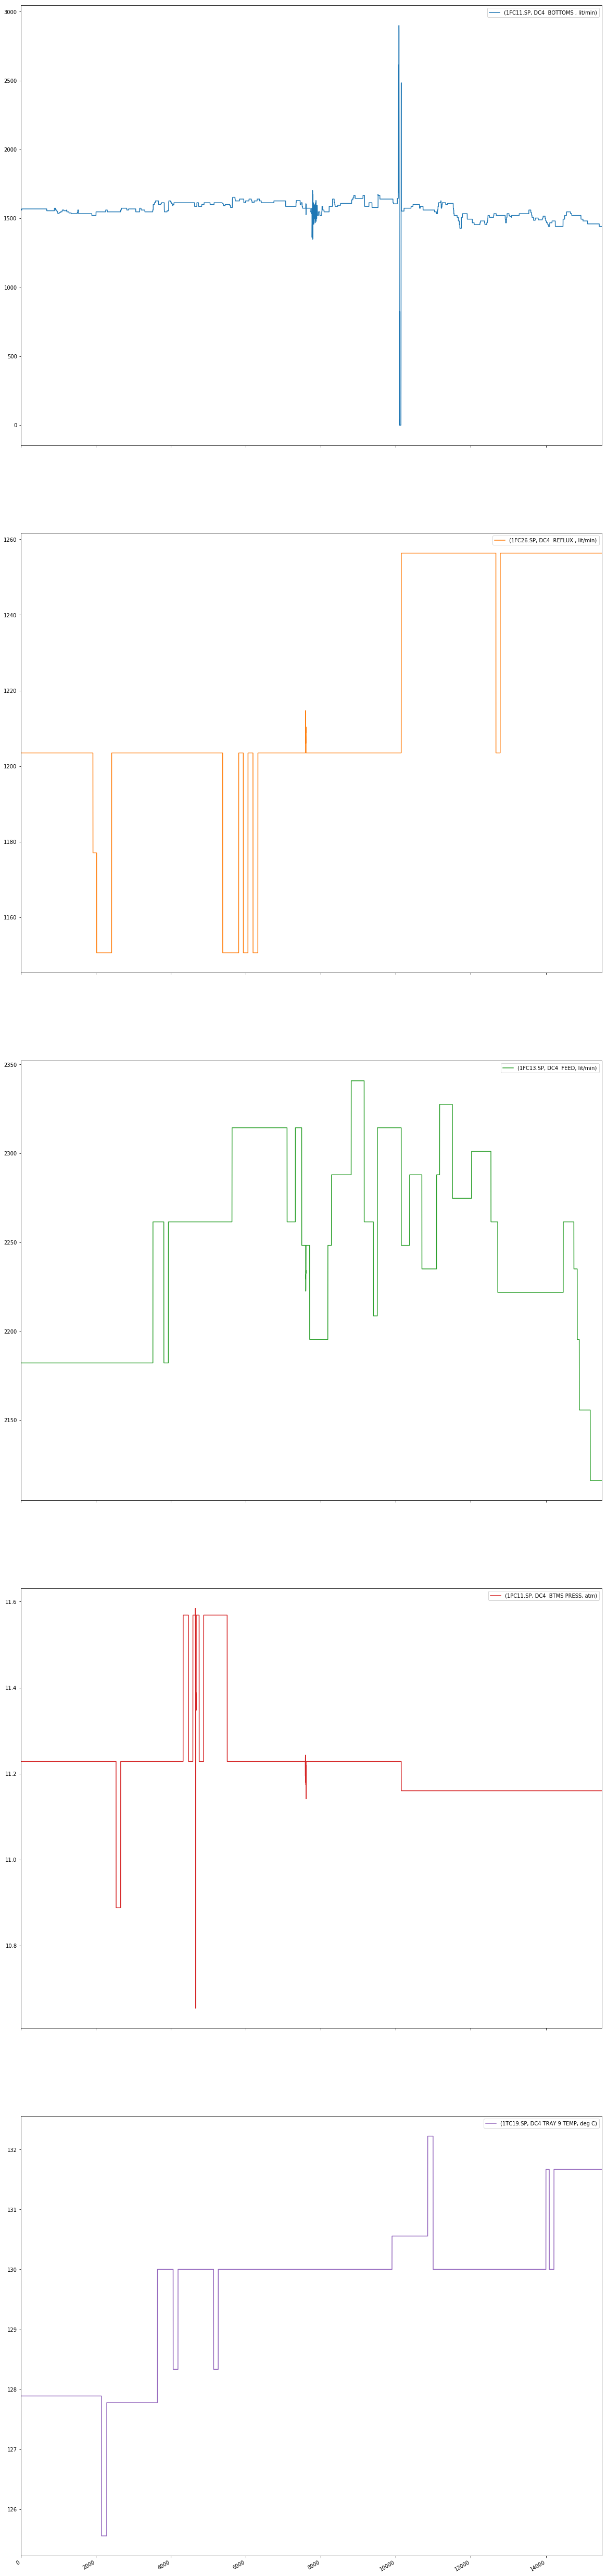

In [51]:
df[MVs].plot(subplots=True,figsize=(20,100))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026613FE24E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000266176C02E8>], dtype=object)

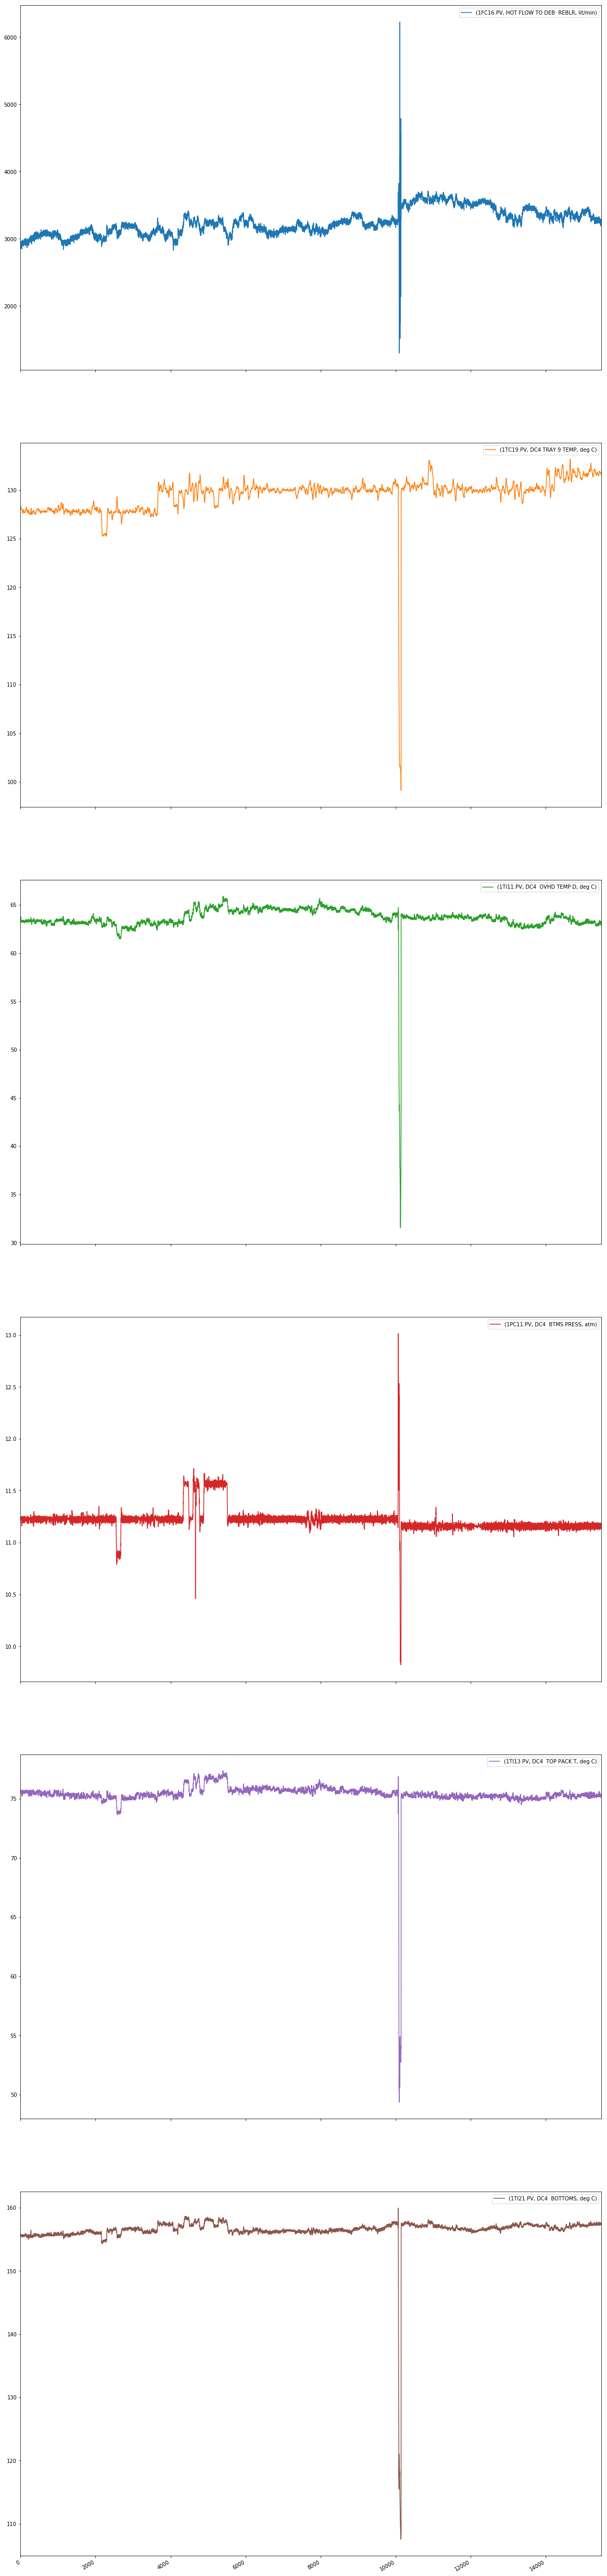

In [56]:
df[CVs].plot(subplots=True,figsize=(20,100))

before modeling , convert everything to deviation variables 
evaluate the effect of each MV one b one 
sum up th contributions of all MVs

In [58]:
segment = df[0:10000]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266178563C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026617AE76D8>], dtype=object)

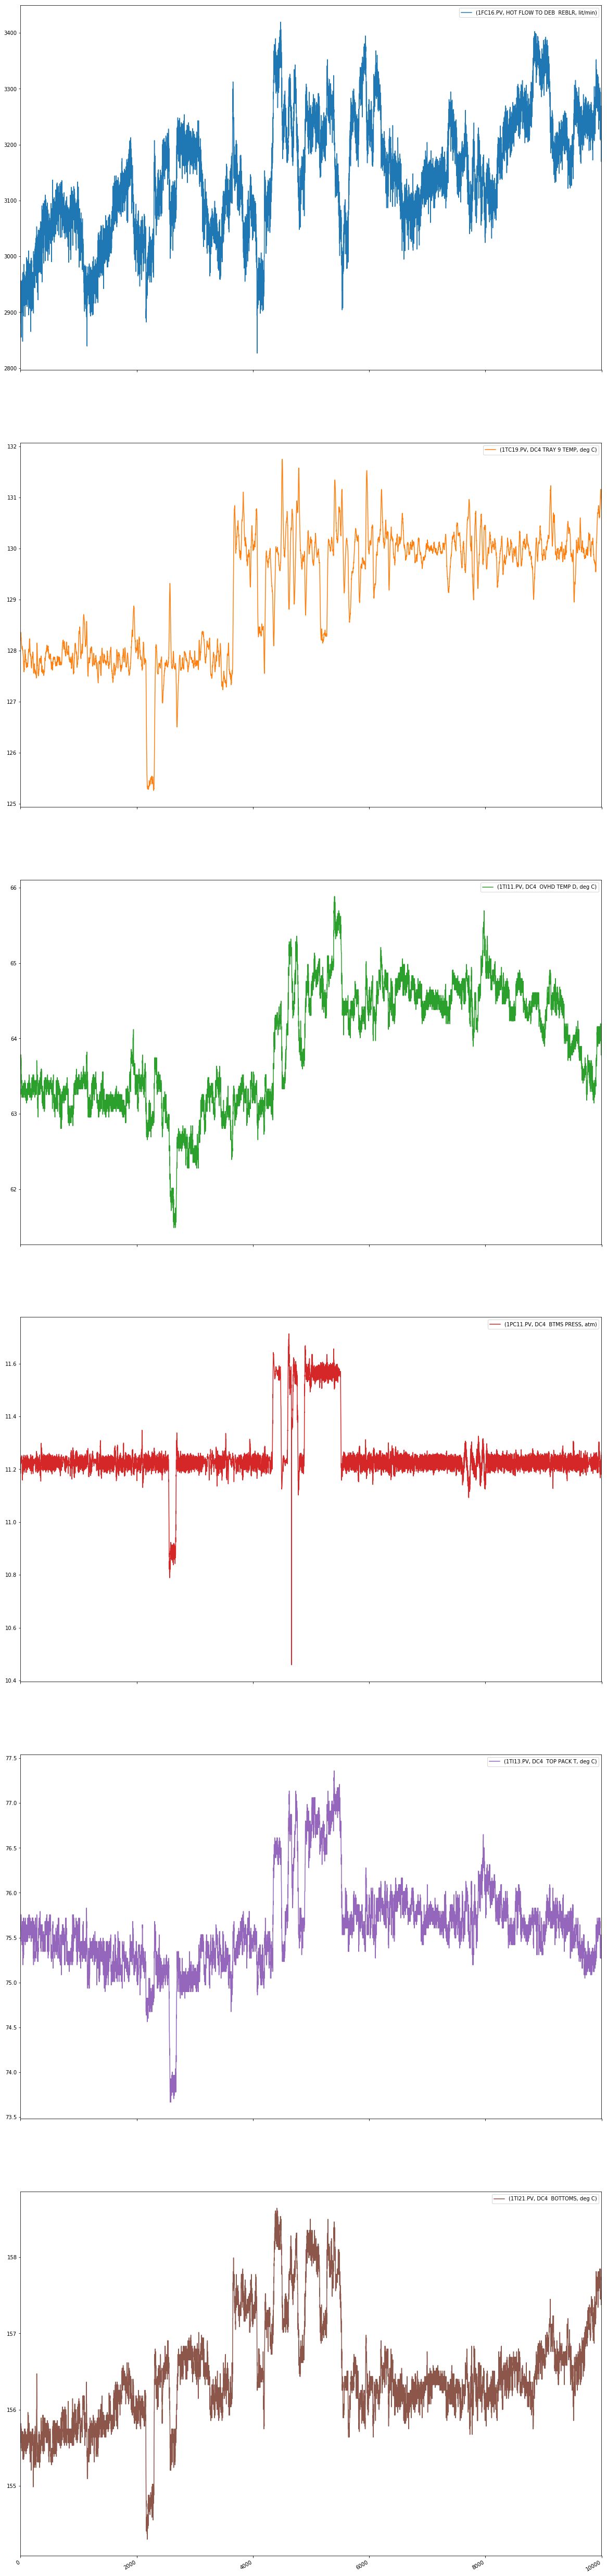

In [59]:
segment[CVs].plot(subplots=True,figsize=(20,100))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026617EC7B70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026618273D30>], dtype=object)

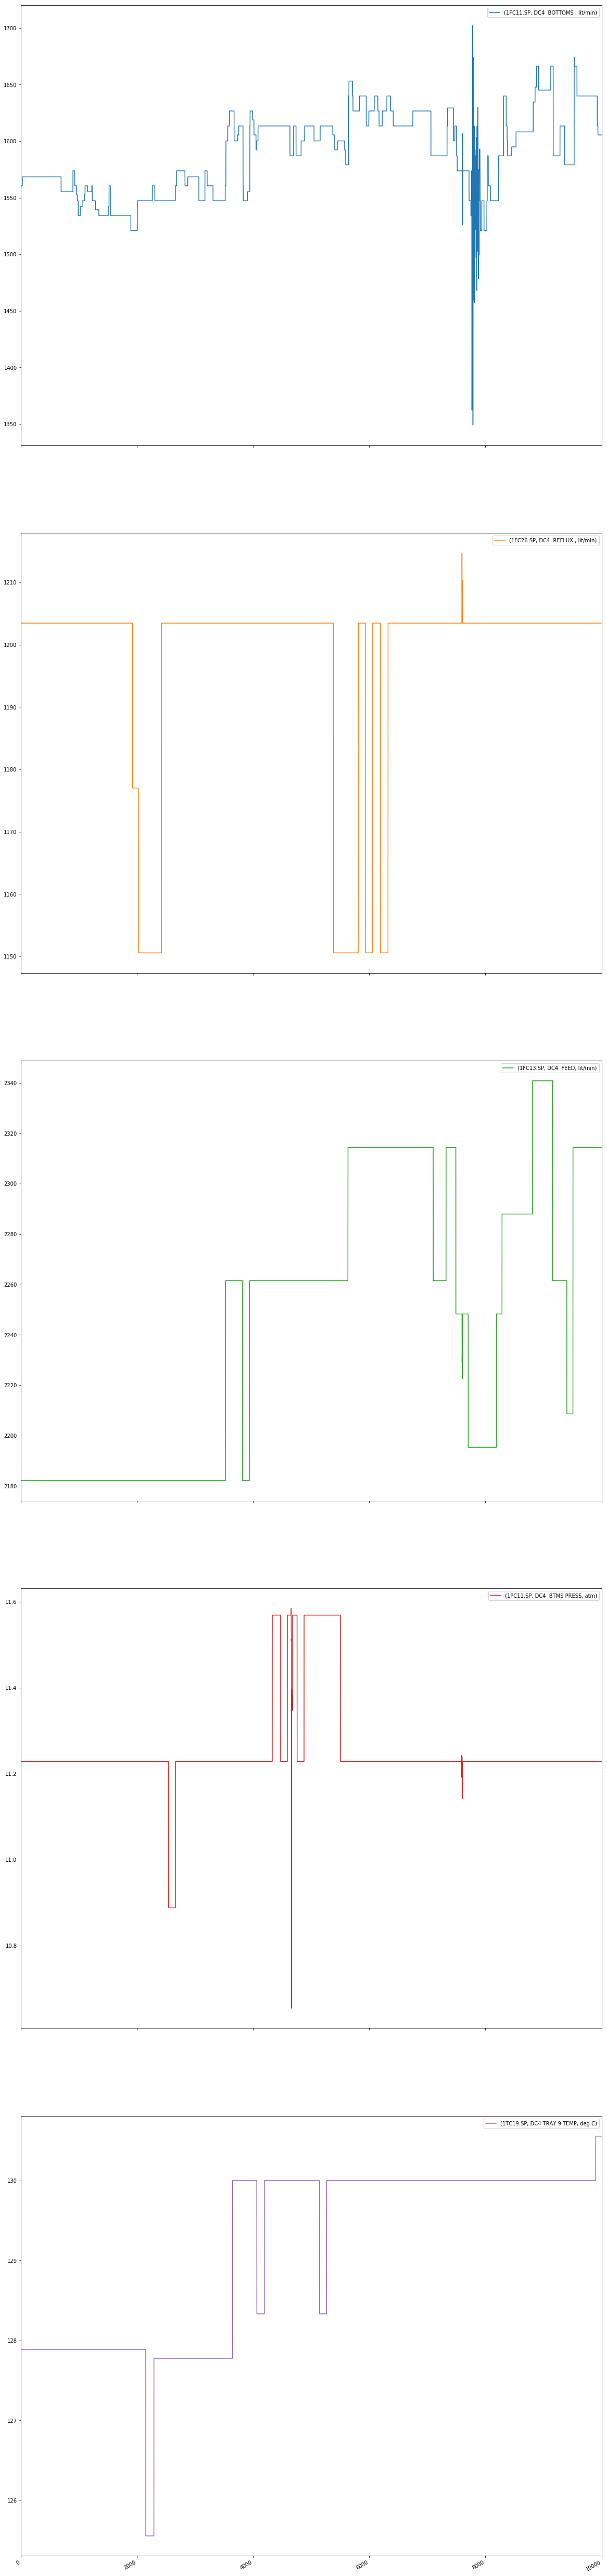

In [61]:
segment[MVs].plot(subplots=True,figsize=(20,100))

In [57]:
#first we model only 2 MVs 1 CV
def fopdtmimo(segment):
    y = segment[]
    ys = []
    k0,tau0,dt0= p[0]
    k1,tau1,dt1 =p[1]
 
    
    for t in ts:
        dydt_one = (-1/tau0)*y + (k0/tau0)*interp1d(ts,df.iloc[:,'1TC19.SP'])(t-dt0)
        #dydt_two = (-1/tau1)*y + (k1/tau1)*interp1d(ts,df.iloc[:,'1FC26.SP'])(t-dt1)
        
        y += dydt_one
    for t in ts:    
        
        dydt_two = (-1/tau1)*y + (k1/tau1)*interp1d(ts,df.iloc[:,'1FC26.SP'])(t-dt1)
        
        y += dydt_two
        ys.append(y)
    
    return ys

In [23]:
fopdtmimo([[1,5,0],[2,5,0]])

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types